In [183]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [184]:
# Download the punkt tokenizer models
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [185]:
"""
Possible TODO:
- sentiment
- Part of Speech: nouns, verbs, adjectives
- Named entities
- lexical desnity: ratio of content word (nouns, adjectives, adverbs)
"""

'\nPossible TODO:\n- sentiment\n- Part of Speech: nouns, verbs, adjectives\n- Named entities\n- lexical desnity: ratio of content word (nouns, adjectives, adverbs)\n'

## Read Data

In [186]:
# Load the data from csv
df = pd.read_csv('data/hack.csv')

print(df.shape)

(8000, 6)


In [187]:
# count how many is_humor is True
is_humor = df['is_humor'].value_counts()
print(is_humor)

1    4932
0    3068
Name: is_humor, dtype: int64


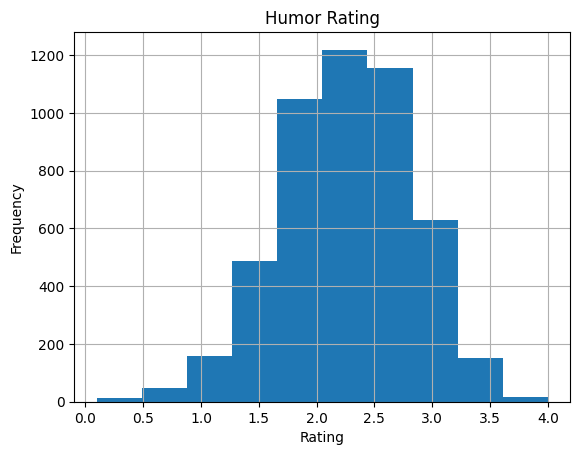

In [188]:
# hist humor_rating
df['humor_rating'].hist()
plt.title('Humor Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [189]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == True].iloc[i]['text'])
    print()

TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...

A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step

How many men does it take to open a can of beer? None. It should be open by the time she brings it to the couch.

Told my mom I hit 1200 Twitter followers. She pointed out how my brother owns a house and I'm wanted by several collection agencies. Oh ma!

Roses are dead. Love is fake. Weddings are basically funerals with cake.



In [190]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == False].iloc[i]['text'])
    print()

'Trabajo,' the Spanish word for work, comes from the Latin term 'trepaliare,' meaning torture.

I enrolled on some skill training and extra curricula activities that added shape to my weekends and after-work schedule. The more days passed, the more exposed I was to how blindly in love I was with an obsession. It's been months now and we are just cool as men.

Men who ejaculated 21 times or more a month had a lower risk of prostate cancer than those who ejaculated four to seven times a month, according to researchers at Harvard T.H. Chan School of Public Health.

I got REALLY angry today and it wasn't about nothing, but you're going to have to take my word for that.

A dog in Mexico named Frida saved the lives of 12 people who were trapped under rubble after an earthquake in 2017. She has identified a total of 52 bodies throughout her career and is considered a national heroine. She's officially retired.



## Tokenize

In [191]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [192]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens

In [193]:
# tokenization
df['tokenized_text'] = df['text'].apply(word_tokenize)

In [194]:
# standardize tokenized text
df['standardized_text'] = df['text'].apply(preprocess_text)

## Added General Characteristics

In [195]:
# count length of each joke
df['text_length'] = df['text'].apply(len)

In [196]:
# word count of each joke
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [197]:
# avg word length of each joke
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [198]:
# count of punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in ['.', ',', '!', '?']]))

In [199]:
# stop words / total words
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

def calculate_stopword_ratio(tokens):
    non_stopwords = remove_stopwords(tokens)
    if len(tokens) == 0:
        return 0
    return 1 - (len(non_stopwords) / len(tokens))

df['stopword_ratio'] = df['tokenized_text'].apply(calculate_stopword_ratio)

In [200]:
def calculate_richness(tokens):
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

df['richness'] = df['standardized_text'].apply(calculate_richness)

In [201]:
def get_readability(text):
    score = textstat.automated_readability_index(text)
    return score

"""other scores:
- flesch_reading_ease
- flesch_kincaid_grade
- smog_index
- coleman_liau_index
- automated_readability_index
- dale_chall_readability_score
- linsear_write_formula
- gunning_fog
- text_standard
"""


'other scores:\n- flesch_reading_ease\n- flesch_kincaid_grade\n- smog_index\n- coleman_liau_index\n- automated_readability_index\n- dale_chall_readability_score\n- linsear_write_formula\n- gunning_fog\n- text_standard\n'

In [202]:
df['readability'] = df['text'].apply(get_readability)

In [203]:
def get_difficult_words(text):
    score = textstat.difficult_words(text) / len(text.split())
    return score

In [204]:
df['difficult_words'] = df['text'].apply(get_difficult_words)

## Plots of Characteristics

In [205]:
def hist_compare(df, column, title):
    print(df.groupby('is_humor')[column].agg(['mean', 'min', 'max', 'std']))
    plt.hist(df[df['is_humor'] == True][column], bins=20, alpha=0.5, label='is_humor=True')
    plt.hist(df[df['is_humor'] == False][column], bins=20, alpha=0.5, label='is_humor=False')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    return plt

                mean  min  max        std
is_humor                                 
0         122.351695    8  286  62.714395
1         107.076440   10  280  44.714322


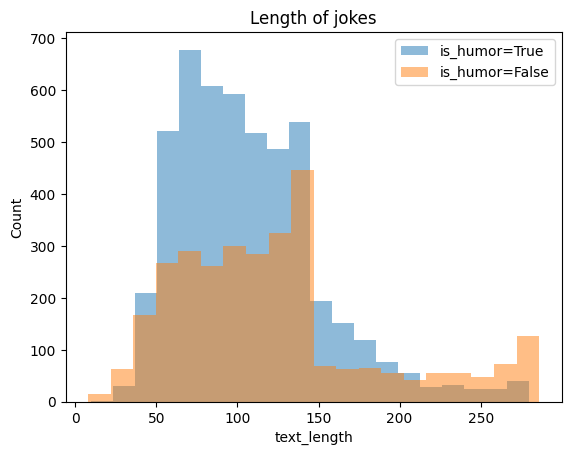

In [206]:
# 2 hist of length of jokes
hist_compare(df, 'text_length', 'Length of jokes').show()

               mean  min  max        std
is_humor                                
0         21.932855    1   63  11.166029
1         20.240268    2   57   8.590675


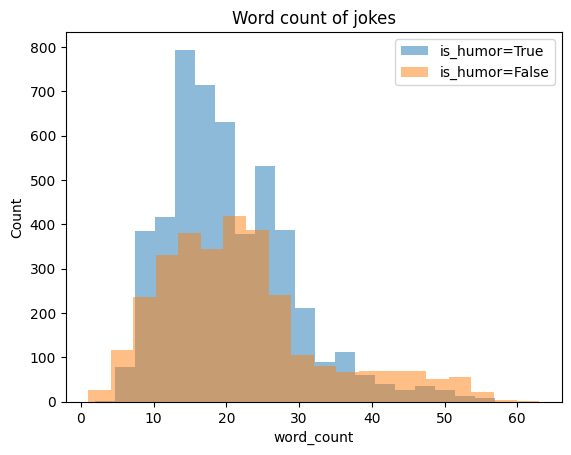

In [207]:
# 2 hist of word count of jokes
hist_compare(df, 'word_count', 'Word count of jokes').show()

              mean       min   max       std
is_humor                                    
0         4.663354  2.857143   9.0  0.685291
1         4.400999  2.700000  11.2  0.591486


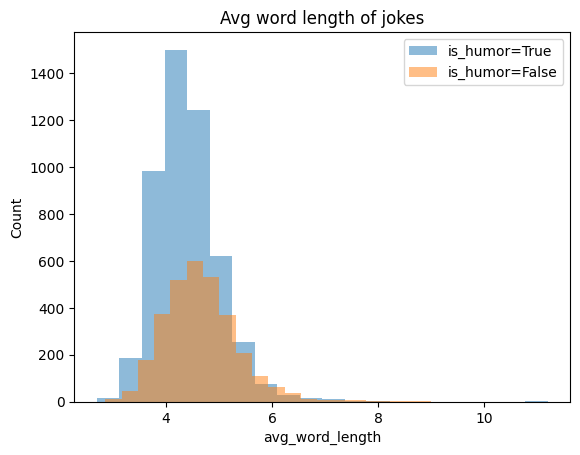

In [208]:
# 2 hist of avg word length of jokes
hist_compare(df, 'avg_word_length', 'Avg word length of jokes').show()

              mean  min  max       std
is_humor                              
0         2.678944    0   17  2.078564
1         2.580495    0   18  2.037324


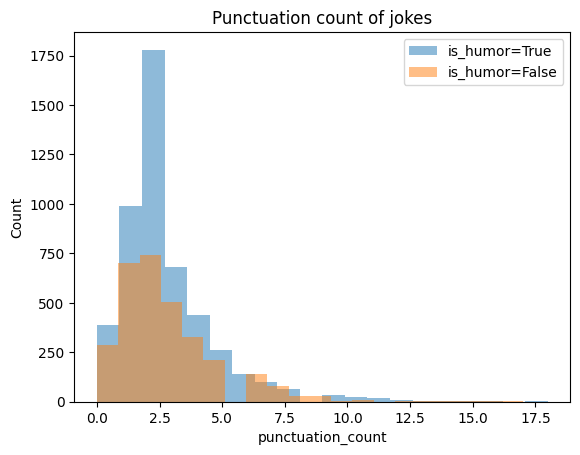

In [209]:
# 2 hist of punctuation count of jokes
hist_compare(df, 'punctuation_count', 'Punctuation count of jokes').show()

              mean       min  max       std
is_humor                                   
0         0.907072  0.083333  1.0  0.096626
1         0.912667  0.380952  1.0  0.101766


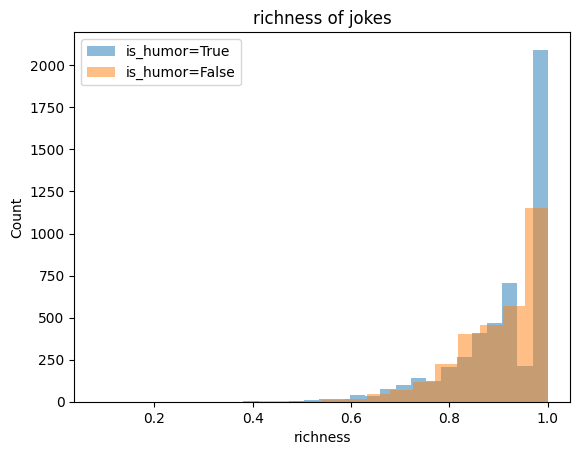

In [210]:
# 2 hist of richness of jokes
hist_compare(df, 'richness', 'richness of jokes').show()

              mean  min       max       std
is_humor                                   
0         0.379534  0.0  0.800000  0.114908
1         0.409674  0.0  0.666667  0.091620


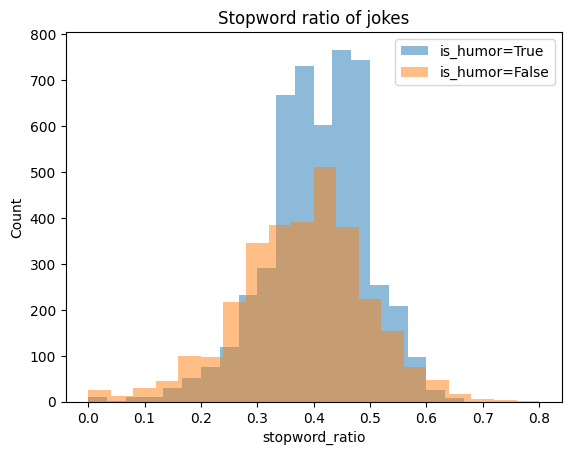

In [211]:
# 2 hist of stopword_ratio of jokes
hist_compare(df, 'stopword_ratio', 'Stopword ratio of jokes').show()

              mean  min   max       std
is_humor                               
0         7.476630 -4.5  25.6  4.382482
1         5.576237 -4.2  33.8  3.856280


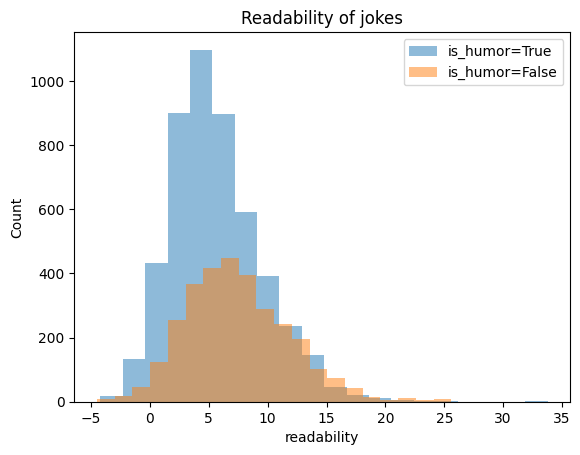

In [212]:
# 2 hist of readability of jokes
hist_compare(df, 'readability', 'Readability of jokes').show()

              mean  min  max       std
is_humor                              
0         0.161266  0.0  1.0  0.116968
1         0.133189  0.0  0.8  0.090085


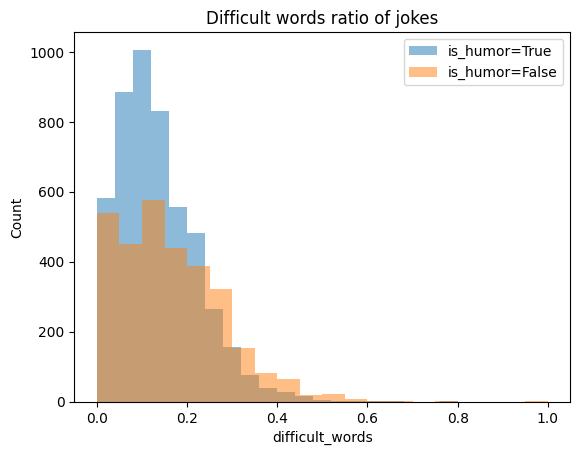

In [213]:
hist_compare(df, 'difficult_words', 'Difficult words ratio of jokes').show()

## Plots of Characteristics detailed

In [214]:
def scatter_plot(x_col, y_col , title, x_label, y_label):
    plt.figure(figsize=(6, 6))
    # scatterplot of text_length and word_count
    scatter = plt.scatter(df[x_col], df[y_col], c=df['is_humor'], alpha=0.5, cmap='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Create a custom legend
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.5)
    legend_labels = ['Not Humor', 'Humor']
    plt.legend(handles, legend_labels)
    return plt

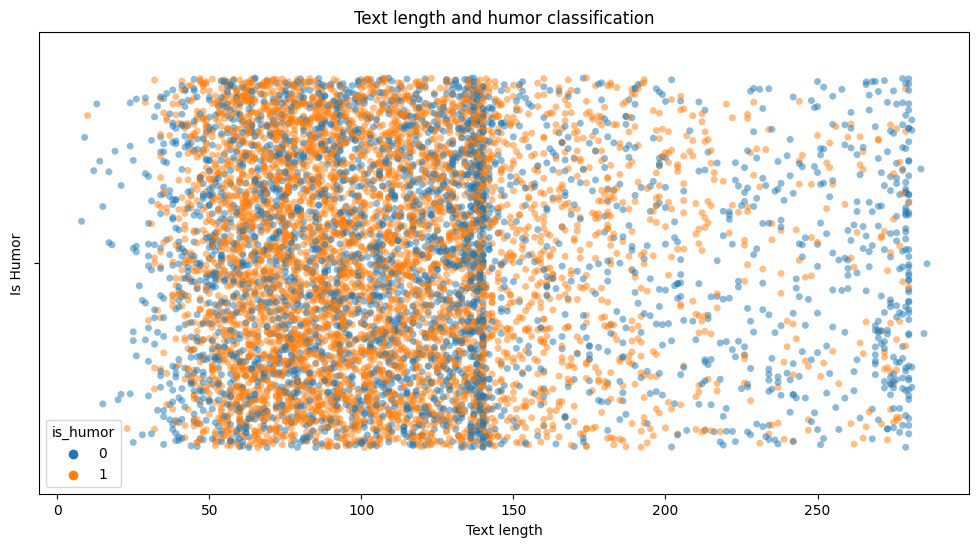

In [215]:
# Plot the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x='text_length', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Text length and humor classification')
plt.xlabel('Text length')
plt.ylabel('Is Humor')
plt.show()

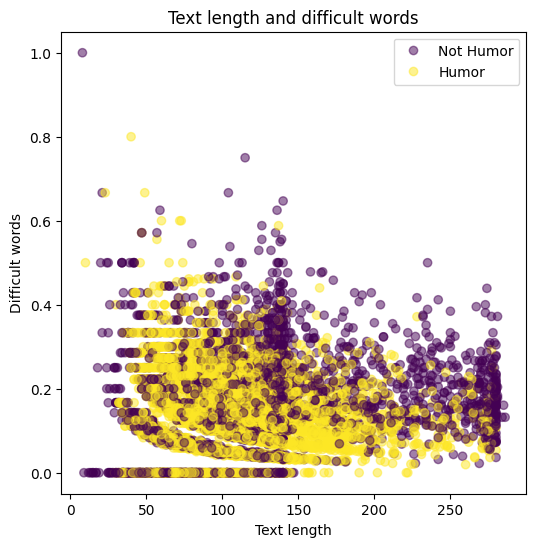

In [216]:
scatter_plot('text_length', 'difficult_words', 'Text length and difficult words', 'Text length', 'Difficult words').show()

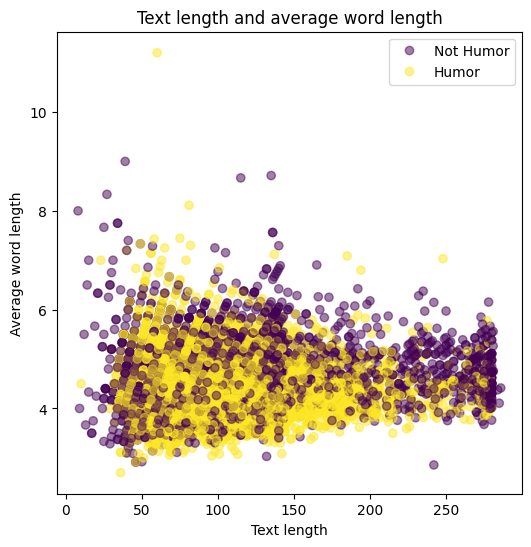

In [217]:
scatter_plot('text_length', 'avg_word_length', 'Text length and average word length', 'Text length', 'Average word length').show()

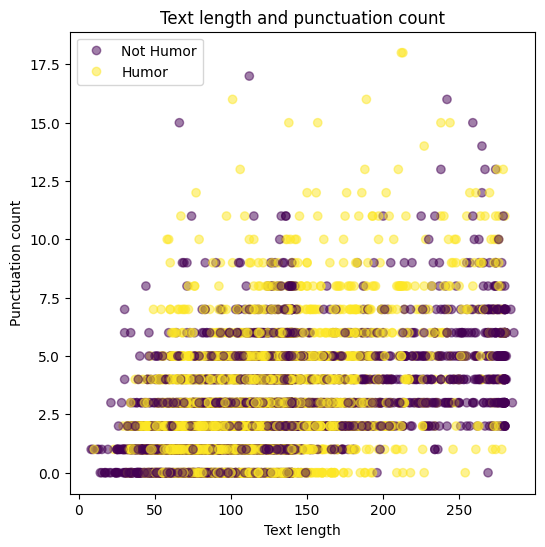

In [218]:
scatter_plot('text_length', 'punctuation_count', 'Text length and punctuation count', 'Text length', 'Punctuation count').show()

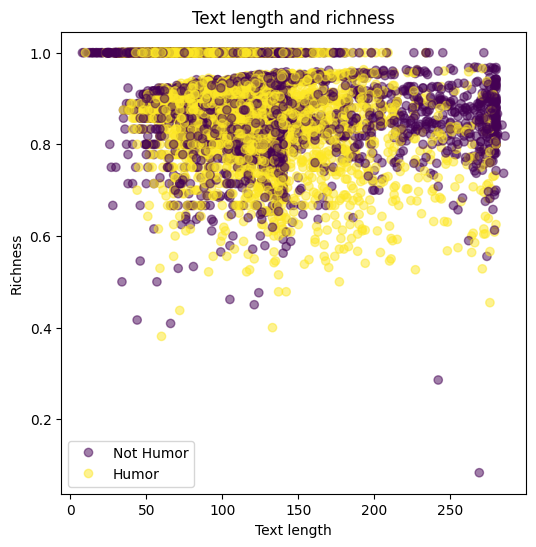

In [219]:
scatter_plot('text_length', 'richness', 'Text length and richness', 'Text length', 'Richness').show()

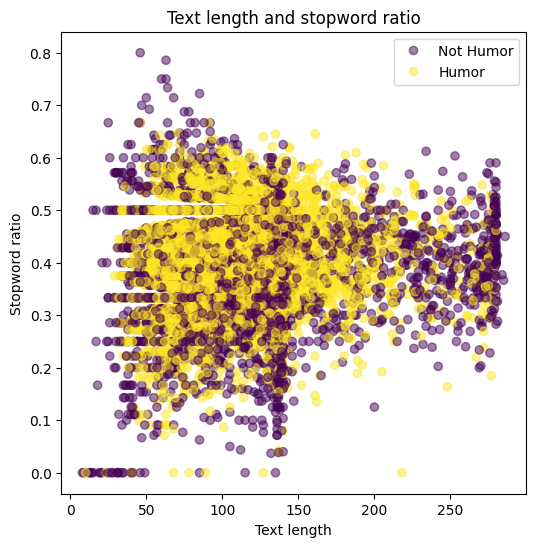

In [220]:
scatter_plot('text_length', 'stopword_ratio', 'Text length and stopword ratio', 'Text length', 'Stopword ratio').show()

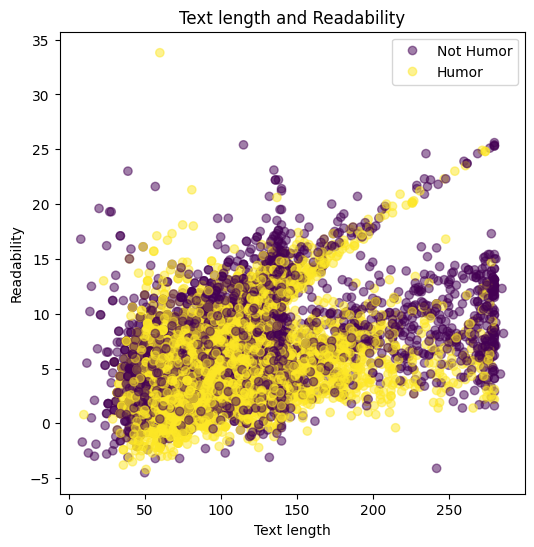

In [221]:
scatter_plot('text_length', 'readability', 'Text length and Readability', 'Text length', 'Readability').show()

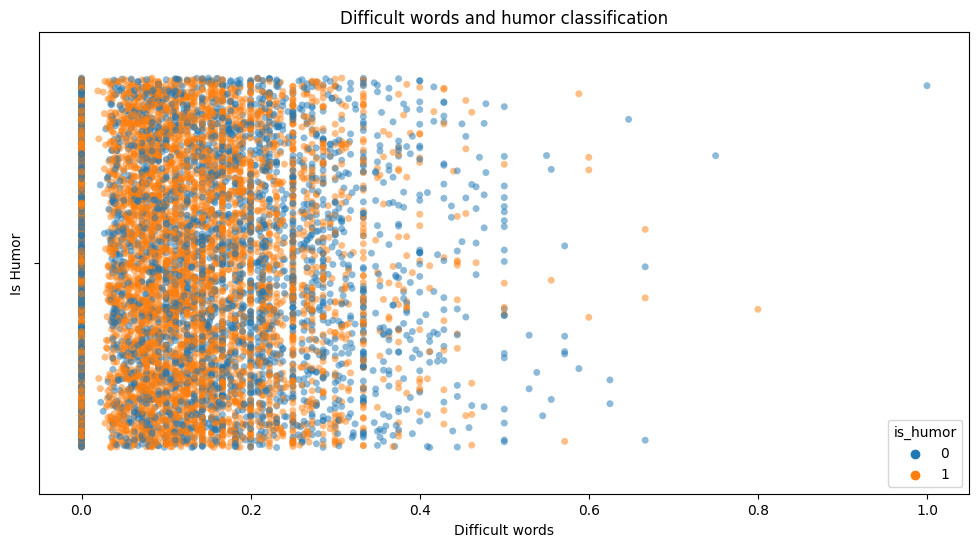

In [222]:
# stripplot of difficult_words
plt.figure(figsize=(12, 6))
sns.stripplot(x='difficult_words', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Difficult words and humor classification')
plt.xlabel('Difficult words')
plt.ylabel('Is Humor')
plt.show()

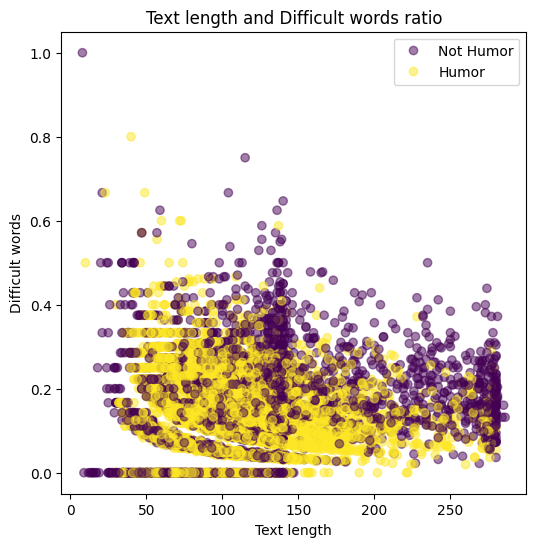

In [223]:
scatter_plot('text_length', 'difficult_words', 'Text length and Difficult words ratio', 'Text length', 'Difficult words').show()